In [67]:
import tensorflow as tf
import tensorflow_datasets as tfds

ds = tfds.load('mnist', split='train', shuffle_files=True)
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]

In [68]:
!pip install pillow


In [69]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

2.17.0
3.4.1


In [85]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


texts = [
    "ሰላም ናሆም",
    "እንደምን ነህ?",
    "ሰላም እንዴት ነህ?",
    "መልካም ቀን",
]
labels = [0, 1, 1, 0]

tokenizer = Tokenizer(char_level=False, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')

# CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=padded_sequences.shape[1]),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

padded_sequences_tensor = tf.convert_to_tensor(padded_sequences, dtype=tf.int32)
labels_tensor = tf.convert_to_tensor(labels, dtype=tf.int32)

model.fit(padded_sequences_tensor, labels_tensor, epochs=5)



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6909
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.6747
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.6609
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6483
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.6360


In [72]:
test_loss, test_accuracy = model.evaluate(padded_sequences_tensor, labels_tensor)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 1.0000 - loss: 0.6125
Test Loss: 0.6124572157859802
Test Accuracy: 1.0


In [90]:
new_texts = [
    "እንደምን ነህ?",
    "መልካም ቀን!",
    "ሰላም ናሆም",
    "ሰላም እንዴት ነህ?",

]
#Tokenize
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, padding='post', maxlen=padded_sequences.shape[1])

predictions = model.predict(new_padded_sequences)
predicted_classes = np.argmax(predictions, axis=1)

#Print predictions
for text, prediction in zip(new_texts, predicted_classes):
    print(f"Text: '{text}' - Predicted Class: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Text: 'እንደምን ነህ?' - Predicted Class: 1
Text: 'መልካም ቀን!' - Predicted Class: 0
Text: 'ሰላም ናሆም' - Predicted Class: 0
Text: 'ሰላም እንዴት ነህ?' - Predicted Class: 1


In [91]:

model.save('text_classification_model.h5')
#Load the model
loaded_model = tf.keras.models.load_model('text_classification_model.h5')


In [92]:
# Save the model in native Keras format
model.save('text_classification_model.keras')


In [93]:
# Load the model
loaded_model = tf.keras.models.load_model('text_classification_model.keras')
loaded_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [94]:
new_texts = [
      "እንደምን ነህ?",
    "መልካም ቀን!",
    "ሰላም ናሆም",
    "ሰላም እንዴት ነህ?",
]


In [95]:
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, padding='post', maxlen=padded_sequences.shape[1])
new_padded_sequences_tensor = tf.convert_to_tensor(new_padded_sequences, dtype=tf.int32)


In [96]:
predictions = loaded_model.predict(new_padded_sequences_tensor)

for i, text in enumerate(new_texts):
    print(f"Text: {text}")
    print(f"Predicted class: {np.argmax(predictions[i])}")
    print(f"Prediction confidence: {predictions[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Text: እንደምን ነህ?
Predicted class: 1
Prediction confidence: [0.4570862  0.54291373]
Text: መልካም ቀን!
Predicted class: 0
Prediction confidence: [0.53239346 0.46760654]
Text: ሰላም ናሆም
Predicted class: 0
Prediction confidence: [0.52267176 0.47732824]
Text: ሰላም እንዴት ነህ?
Predicted class: 1
Prediction confidence: [0.4529149 0.5470851]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Text: 'እንደምን ነህ?'
Predicted Label: Acknowledgment

Text: 'መልካም ቀን!'
Predicted Label: Greeting

Text: 'ሰላም ናሆም'
Predicted Label: Greeting

Text: 'ሰላም እንዴት ነህ?'
Predicted Label: Acknowledgment



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4773 (\N{ETHIOPIC SYLLABLE GLOTTAL E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4757 (\N{ETHIOPIC SYLLABLE NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4848 (\N{ETHIOPIC SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4752 (\N{ETHIOPIC SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4613 (\N{ETHIOPIC SYLLABLE HE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pa

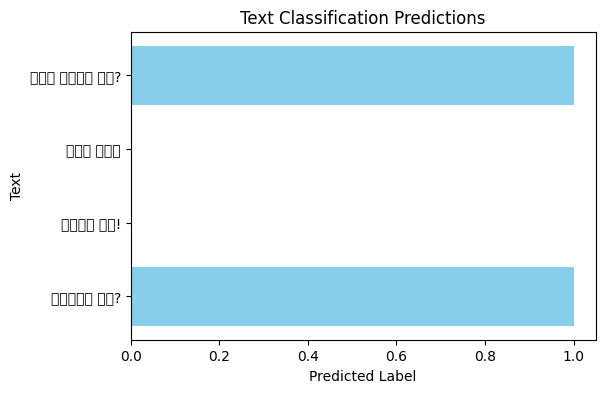

In [97]:
import matplotlib.pyplot as plt

# Tokenize
new_texts = [
      "እንደምን ነህ?",
    "መልካም ቀን!",
    "ሰላም ናሆም",
    "ሰላም እንዴት ነህ?",
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, padding='post')

#Predict using the loaded model
predictions = loaded_model.predict(new_padded_sequences)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Mapping for predicted labels
label_map = {0: "Greeting", 1: "Acknowledgment"}

# Print results
for i, text in enumerate(new_texts):
    print(f"Text: '{text}'")
    print(f"Predicted Label: {label_map[predicted_labels[i]]}\n")

plt.figure(figsize=(6, 4))
plt.barh(new_texts, predicted_labels, color='skyblue')
plt.xlabel('Predicted Label')
plt.ylabel('Text')
plt.title('Text Classification Predictions')
plt.show()
